In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from  sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv('standardscaler_.csv')
df

,Experience_Years,Age,Education_Level,Hours_Per_Week,Salary
0,5.99,34.63,3,41.12,87638.54
1,4.72,39.55,4,46.82,84956.80
2,6.30,23.01,1,40.63,73501.52
3,8.05,32.81,4,37.85,100707.27
4,4.53,26.75,3,40.61,80094.46
...,...,...,...,...,...
495,6.08,28.59,4,33.27,67897.46
496,2.93,38.99,4,40.63,76200.98
497,4.62,33.20,4,49.69,72773.89
498,3.25,27.14,4,35.00,76373.15


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Experience_Years  500 non-null    float64
 1   Age               500 non-null    float64
 2   Education_Level   500 non-null    int64  
 3   Hours_Per_Week    500 non-null    float64
 4   Salary            500 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 19.7 KB


In [4]:
df.columns

Index(['Experience_Years', 'Age', 'Education_Level', 'Hours_Per_Week',
       'Salary'],
      dtype='object')

In [5]:
x=df[['Experience_Years', 'Age', 'Education_Level', 'Hours_Per_Week']]
y=df['Salary']

In [6]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [7]:
model=LinearRegression()

In [8]:
model.fit(xtrain,ytrain)

LinearRegression()

In [9]:
ypred=model.predict(xtest)
ypred

array([ 82176.40609769,  79067.18468178,  83935.17650671,  60211.03309838,
        79246.35685955,  81790.45728694,  67326.01190022,  76580.45840669,
        72158.20117163,  65762.64810828,  69143.8996447 ,  73901.08887446,
        60241.58644084,  59463.3979907 ,  73810.32186833,  74172.25233798,
        83790.60171906,  76522.58432355,  86267.64945596,  81979.00374478,
        80685.76036955,  76417.05524639,  66095.62896185,  69631.90988425,
        67387.21563091,  72631.15659235,  80666.38020212,  89709.5041917 ,
        76450.65695606,  88819.44648931,  61510.13567694,  64413.41122402,
        79274.91796727,  84229.39795068,  70179.46918808,  63070.47692247,
        77613.94119776,  73075.43685448, 105264.63485633,  55408.79181811,
        73794.68527267,  64882.65288749,  62948.517367  ,  81580.74174147,
        59798.01725169,  73625.06500088,  80478.98262604,  62940.45400719,
        59476.90523099,  69823.82373452,  71283.5846464 ,  71528.52337975,
        77611.19605074,  

In [11]:
r2_score(ytest,ypred)

0.36362143647183764

In [12]:
mean_squared_error(ytest,ypred)

126025919.32852508

In [13]:
mean_absolute_error(ytest,ypred)

9188.536737319992

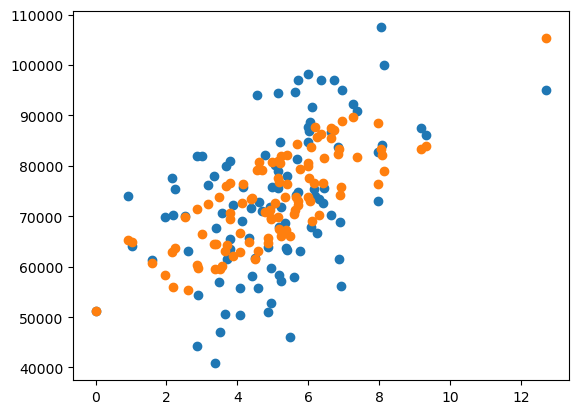

In [14]:
plt.scatter(xtest['Experience_Years'],ytest)
plt.scatter(xtest['Experience_Years'],ypred)

In [15]:
scalar=StandardScaler()
xscale=scalar.fit_transform(xtrain)
xtestscale=scalar.transform(xtest)

In [16]:
poly=PolynomialFeatures(degree=2)

In [17]:
xpoly=poly.fit_transform(xscale)


In [18]:
model.fit(xpoly,ytrain)

LinearRegression()

In [19]:
xtestpoly=poly.transform(xtestscale)

In [20]:
# xtestpoly=poly.transform(xtest)

In [21]:
y_pred=model.predict(xtestpoly)
y_pred

array([79947.33728953, 78547.47691312, 81074.15987061, 60448.2070396 ,
       80093.17522782, 81637.93612214, 67341.19039669, 76238.46053255,
       71747.32280823, 67618.31311778, 68915.4746431 , 77805.84265446,
       60113.79516095, 59418.82406028, 74211.03717273, 73770.08249455,
       86221.32789594, 76285.37482131, 86465.57871311, 82572.81986458,
       80976.00726052, 73870.84995691, 65789.04148697, 70191.41710564,
       69483.95316418, 74297.64616262, 81562.22303152, 89040.84066178,
       75554.93343186, 88125.65815735, 61803.10280497, 63398.21459914,
       79756.84112927, 83966.60042666, 69954.37660011, 65943.22522793,
       80441.52004906, 73724.04612756, 98871.04355032, 54210.7070691 ,
       75974.19128832, 70382.43697194, 61014.78935355, 82152.53510335,
       61492.85487963, 74270.28355777, 81132.98807328, 65646.18694208,
       58774.41657821, 71314.81356565, 72881.19640461, 69760.72210272,
       78399.42874903, 76956.24721028, 70653.17142301, 83047.52692811,
      

In [22]:
r2_score(ytest,y_pred)

0.2860694593826537

In [23]:
mean_absolute_error(ytest,y_pred)

9843.598450529234

In [24]:
mean_squared_error(ytest,y_pred)

141384009.25886983